In [1]:
import requests
import datetime
import time
import zipfile
import json
import os
import io
import re
from collections import Counter
from github import Github
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from github import Github
from dateutil.relativedelta import relativedelta, MO
import nltk
from requests.auth import HTTPBasicAuth
from datetime import datetime, timedelta
import csv
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlparse

from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import time

In [2]:
dat = "combined_issues.csv"
df = pd.read_csv(dat, encoding="utf-8")
df

,repo_name,project_lang,issue_title,issue_body,issue_date,issue_status,issue_categories,issued_close_date
0,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Tuesday,### Update [pytz](https://pypi.org/projec...,2023-11-21T12:05:12Z,Open,update,2023-11-21T19:21:46.359143
1,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Monday,### Update [pytz](https://pypi.org/projec...,2023-11-20T12:05:11Z,Closed,update,2023-11-21T12:05:18Z
2,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Sunday,### Update [pytz](https://pypi.org/projec...,2023-11-19T12:05:28Z,Closed,update,2023-11-20T12:05:17Z
3,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Saturday,### Update [pytz](https://pypi.org/projec...,2023-11-18T12:05:10Z,Closed,update,2023-11-19T12:05:32Z
4,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Friday,### Update [pytz](https://pypi.org/projec...,2023-11-17T12:05:11Z,Closed,update,2023-11-18T12:05:15Z
...,...,...,...,...,...,...,...,...
23097,zillionare/python-project-wizard,Python,Unittest support,Multiple issues with this cookiecutter\r \r 1-...,2022-02-14T18:33:49Z,Closed,NaN,2022-02-15T00:34:02Z
23098,zillionare/python-project-wizard,Python,Fix Links In CONTRIBUTING.md,The conversion process from .rst -> .md caused...,2021-08-07T20:47:13Z,Closed,NaN,2021-08-07T20:50:51Z
23099,zillionare/python-project-wizard,Python,mkdocs colour toggle option,* Date you used Cookiecutter PyPackage: 15/6/2...,2021-06-15T09:48:46Z,Closed,NaN,2021-06-15T11:03:13Z
23100,zillionare/python-project-wizard,Python,Fix Tutorial link,NaN,2021-05-08T06:48:48Z,Closed,NaN,2021-06-01T18:36:33Z


In [5]:
jsonpath = "combined_issue.json"

df.to_json(jsonpath, orient='records', lines=True)

In [3]:
python = df[df["project_lang"] == "Python"]
JavaScript = df[df["project_lang"] == "JavaScript"]
Makefile = df[df["project_lang"] == "Makefile"]
Go = df[df["project_lang"] == "Go"]
Kotlin = df[df["project_lang"] == "Kotlin"]
Shell = df[df["project_lang"] == "Shell"]
Typescript = df[df["project_lang"] == "Typescript"]
CSS = df[df["project_lang"] == "Python"]
Java = df[df["project_lang"] == "Java"]
Dockerfile = df[df["project_lang"] == "Dockerfile"]
Rubby = df[df["project_lang"] == "Rubby"]
Rust = df[df["project_lang"] == "Rust"]

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')            
keywords_list = 'general'

# Sample text
text = "This is an example sentence, demonstrating the removal of stopwords."

# Tokenize the text
words = word_tokenize(text)

# Remove stopwords
filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]

# Print the result
print(filtered_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...


['example', 'sentence', ',', 'demonstrating', 'removal', 'stopwords', '.']


[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')            
keywords_list = 'general'

for_issue = df

for_issue['issue_title'].fillna('', inplace=True)

# Extract issue titles
issue_titles = for_issue["issue_title"]

words_fi = word_tokenize(issue_titles)

# Remove stopwords
filtered_words = [word for word in words_fi if word.lower() not in stopwords.words_fi('english')]

# Print the result
print(filtered_words)

In [11]:
for_issue

,repo_name,project_lang,issue_title,issue_body,issue_date,issue_status,issue_categories,issued_close_date
0,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Tuesday,### Update [pytz](https://pypi.org/projec...,2023-11-21T12:05:12Z,Open,update,2023-11-21T19:21:46.359143
1,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Monday,### Update [pytz](https://pypi.org/projec...,2023-11-20T12:05:11Z,Closed,update,2023-11-21T12:05:18Z
2,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Sunday,### Update [pytz](https://pypi.org/projec...,2023-11-19T12:05:28Z,Closed,update,2023-11-20T12:05:17Z
3,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Saturday,### Update [pytz](https://pypi.org/projec...,2023-11-18T12:05:10Z,Closed,update,2023-11-19T12:05:32Z
4,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Friday,### Update [pytz](https://pypi.org/projec...,2023-11-17T12:05:11Z,Closed,update,2023-11-18T12:05:15Z
...,...,...,...,...,...,...,...,...
23097,zillionare/python-project-wizard,Python,Unittest support,Multiple issues with this cookiecutter\r \r 1-...,2022-02-14T18:33:49Z,Closed,NaN,2022-02-15T00:34:02Z
23098,zillionare/python-project-wizard,Python,Fix Links In CONTRIBUTING.md,The conversion process from .rst -> .md caused...,2021-08-07T20:47:13Z,Closed,NaN,2021-08-07T20:50:51Z
23099,zillionare/python-project-wizard,Python,mkdocs colour toggle option,* Date you used Cookiecutter PyPackage: 15/6/2...,2021-06-15T09:48:46Z,Closed,NaN,2021-06-15T11:03:13Z
23100,zillionare/python-project-wizard,Python,Fix Tutorial link,NaN,2021-05-08T06:48:48Z,Closed,NaN,2021-06-01T18:36:33Z


In [13]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim import corpora, models
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')

# Assuming df is your DataFrame loaded from the CSV
df = df

# Ensure 'issue_body' column doesn't have any missing values
df['issue_body'].fillna('', inplace=True)

# Extract issue bodies
issue_bodies = df["issue_body"]

# Define a function for text cleaning
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters (excluding spaces)
    return text.lower()  # Convert to lowercase

# Apply text cleaning to each issue body
cleaned_bodies = [clean_text(body) for body in issue_bodies]

# Tokenize and remove stopwords for each cleaned issue body
tokenized_bodies = [word_tokenize(body) for body in cleaned_bodies]
filtered_bodies = [
    [word for word in body if word.isalpha() and word not in stopwords.words('english')]
    for body in tokenized_bodies
]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(filtered_bodies)

# Convert the documents to a bag-of-words representation
corpus = [dictionary.doc2bow(body) for body in filtered_bodies]

# Build the LDA model
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Create new columns for topics and associated words
for i in range(lda_model.num_topics):
    topic_column = f"Topic_{i + 1}"
    top_words = [word for word, _ in lda_model.show_topic(i, topn=3)]  # Extract top 3 words for the topic
    df[topic_column] = ''

    for word in top_words:
        df[topic_column] += word + ' '

# Print the DataFrame with topic columns and associated words
print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                          repo_name project_lang  \
0  agconti/cookiecutter-django-rest       Python   
1  agconti/cookiecutter-django-rest       Python   
2  agconti/cookiecutter-django-rest       Python   
3  agconti/cookiecutter-django-rest       Python   
4  agconti/cookiecutter-django-rest       Python   

                                     issue_title  \
0   Scheduled daily dependency update on Tuesday   
1    Scheduled daily dependency update on Monday   
2    Scheduled daily dependency update on Sunday   
3  Scheduled daily dependency update on Saturday   
4    Scheduled daily dependency update on Friday   

                                          issue_body            issue_date  \
0       ### Update [pytz](https://pypi.org/projec...  2023-11-21T12:05:12Z   
1       ### Update [pytz](https://pypi.org/projec...  2023-11-20T12:05:11Z   
2       ### Update [pytz](https://pypi.org/projec...  2023-11-19T12:05:28Z   
3       ### Update [pytz](https://pypi.org/projec...  2023-11-

In [14]:
df

,repo_name,project_lang,issue_title,issue_body,issue_date,issue_status,issue_categories,issued_close_date,Topic_1,Topic_2,Topic_3
0,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Tuesday,### Update [pytz](https://pypi.org/projec...,2023-11-21T12:05:12Z,Open,update,2023-11-21T19:21:46.359143,fix file add,botocore support details,dependabot pr lia
1,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Monday,### Update [pytz](https://pypi.org/projec...,2023-11-20T12:05:11Z,Closed,update,2023-11-21T12:05:18Z,fix file add,botocore support details,dependabot pr lia
2,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Sunday,### Update [pytz](https://pypi.org/projec...,2023-11-19T12:05:28Z,Closed,update,2023-11-20T12:05:17Z,fix file add,botocore support details,dependabot pr lia
3,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Saturday,### Update [pytz](https://pypi.org/projec...,2023-11-18T12:05:10Z,Closed,update,2023-11-19T12:05:32Z,fix file add,botocore support details,dependabot pr lia
4,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Friday,### Update [pytz](https://pypi.org/projec...,2023-11-17T12:05:11Z,Closed,update,2023-11-18T12:05:15Z,fix file add,botocore support details,dependabot pr lia
...,...,...,...,...,...,...,...,...,...,...,...
23097,zillionare/python-project-wizard,Python,Unittest support,Multiple issues with this cookiecutter\r \r 1-...,2022-02-14T18:33:49Z,Closed,NaN,2022-02-15T00:34:02Z,fix file add,botocore support details,dependabot pr lia
23098,zillionare/python-project-wizard,Python,Fix Links In CONTRIBUTING.md,The conversion process from .rst -> .md caused...,2021-08-07T20:47:13Z,Closed,NaN,2021-08-07T20:50:51Z,fix file add,botocore support details,dependabot pr lia
23099,zillionare/python-project-wizard,Python,mkdocs colour toggle option,* Date you used Cookiecutter PyPackage: 15/6/2...,2021-06-15T09:48:46Z,Closed,NaN,2021-06-15T11:03:13Z,fix file add,botocore support details,dependabot pr lia
23100,zillionare/python-project-wizard,Python,Fix Tutorial link,,2021-05-08T06:48:48Z,Closed,NaN,2021-06-01T18:36:33Z,fix file add,botocore support details,dependabot pr lia


In [50]:
Java = df[df["project_lang"] == "JavaScript"]
Shell = df[df["project_lang"] == "Shell"]
Python = df[df["project_lang"] == "Python"]
Make = df[df["project_lang"] == "Makefile"]
Go = df[df["project_lang"] == "Go"]
Swift = df[df["project_lang"] == "Swift"]

In [32]:
Shell

,repo_name,project_lang,issue_title,issue_body,issue_date,issue_status,issue_categories,issued_close_date,Topic_1,Topic_2,Topic_3
16636,goldhand/cookiecutter-webpack,JavaScript,Error installing npm packages,"Hello, I'm running ""run install"" and get error...",2016-08-07T21:50:22Z,Closed,bug,2016-09-24T19:05:55Z,fix file add,botocore support details,dependabot pr lia
16938,jupyter-widgets/widget-cookiecutter,JavaScript,Could not instantiate widget - default folder ...,"Hi,\r \r I think the default `js/lib` naming c...",2023-06-12T09:55:06Z,Closed,NaN,2023-06-12T10:43:13Z,fix file add,botocore support details,dependabot pr lia
16939,jupyter-widgets/widget-cookiecutter,JavaScript,Pointing to anywidget and ipyreact,"@maartenbreddels, @trevmanz are there any adva...",2023-05-16T13:30:05Z,Open,NaN,2023-11-21T19:22:33.907931,fix file add,botocore support details,dependabot pr lia
16940,jupyter-widgets/widget-cookiecutter,JavaScript,Template does not work,This template is currently broken and does not...,2023-03-01T19:46:59Z,Open,NaN,2023-11-21T19:22:33.907931,fix file add,botocore support details,dependabot pr lia
16941,jupyter-widgets/widget-cookiecutter,JavaScript,Update to es6 modules and more modern js syntax,Fixes #104,2022-09-03T10:34:37Z,Closed,NaN,2022-10-21T11:46:14Z,fix file add,botocore support details,dependabot pr lia
...,...,...,...,...,...,...,...,...,...,...,...
20457,thorgate/django-project-template,JavaScript,Bump hosted-git-info from 2.8.8 to 2.8.9 in /c...,Bumps [hosted-git-info](https://github.com/npm...,2021-05-11T23:32:46Z,Closed,"dependencies, javascript",2021-06-17T09:59:53Z,fix file add,botocore support details,dependabot pr lia
20458,thorgate/django-project-template,JavaScript,Bump node-notifier from 8.0.0 to 8.0.1 in /cod...,Bumps [node-notifier](https://github.com/mikae...,2021-02-01T09:15:27Z,Closed,"dependencies, javascript",2021-06-17T09:59:46Z,fix file add,botocore support details,dependabot pr lia
20459,thorgate/django-project-template,JavaScript,Bump cryptography from 3.0 to 3.2,Bumps [cryptography](https://github.com/pyca/c...,2020-10-27T22:16:51Z,Closed,"dependencies, python",2020-12-16T12:24:13Z,fix file add,botocore support details,dependabot pr lia
20460,thorgate/django-project-template,JavaScript,Bump serialize-javascript from 1.5.0 to 5.0.0 ...,Bumps [serialize-javascript](https://github.co...,2020-09-10T09:39:16Z,Closed,"dependencies, javascript",2020-12-10T16:31:40Z,fix file add,botocore support details,dependabot pr lia


In [34]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')            
keywords_list = 'general'

Shell['issue_body'].fillna('', inplace=True)

# Extract issue bodies
issue_bodies = Shell["issue_body"]

# Define a function for text cleaning
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters (excluding spaces)
    return text.lower()  # Convert to lowercase

# Apply text cleaning to each issue body
cleaned_bodies = [clean_text(body) for body in issue_bodies]

#body = Shell["issue_body"]
#body_text = body.lower()
cleaned_bodies = [clean_text(body) for body in issue_bodies]
concatenated_bodies = ' '.join(cleaned_bodies)  # Concatenate the list of strings into a single string

words = nltk.word_tokenize(concatenated_bodies)

# filter out stopwords, non-alphanumeric characters, and other unnecessary words
stop_words = set(nltk.corpus.stopwords.words("english"))
additional_stopwords = {'x', 'y', 'hello', 'issue', 'im', "i'm", "I'm", 'using', 'http', 'https', 'got', 'read', 'hi', 'want', 'please', 'make', 'find', 'url', 'found', 'takes', 'know', 'It', 'tell', 'google'}
#inclusion = {'fail', 'failure', 'bug', 'install', 'error', 'code', 'problem', 'version', 'dataset', 'model', 'training', 'testing', 'validation', 'accuracy', 'loss', 'metrics', 'hyperparameters', 'optimizer', 'gradient', 'backpropagation', 'overfitting', 'underfitting', 'batch size', 'learning rate', 'epoch', 'layer', 'neural network', 'gpu', 'cuda', 'cpu', 'convergence', 'installing', 'installation', 'model error', 'import', 'build', 'not found'}

#words = [w for w in words if len(w) > 1 and w.isalpha() and not w in stop_words and not w in additional_stopwords]
words = [w for w in words if len(w) > 1 and w.isalpha()]
keywords = []

for word in words:
    if word in inclusion:
        keywords.append(word)
    #else:
        #keywords.append("general" if word.isalpha() else "general discussion")

# remove all verbs
tagged_words = nltk.pos_tag(keywords)
keywords = [word for word, tag in tagged_words if not tag.startswith('VB')]

# count the frequency of each word
word_freq = Counter(keywords)

# extract the two most common words and add them to the keywords list
top_words = word_freq.most_common(5)
keywords = [word.replace(",", "") for word, freq in top_words]
keywords_list = ' '.join(keywords)

print(keywords_list)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_5876\81105828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Shell['issue_body'].fillna('', inplace=True)


version bug error code build


In [38]:
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

# Assuming Shell is a DataFrame with a column "issue_body"
Shell['issue_body'].fillna('', inplace=True)

# Extract issue bodies
issue_bodies = Shell["issue_body"]

# Define a function for text cleaning
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters (excluding spaces)
    return text.lower()  # Convert to lowercase

# Apply text cleaning to each issue body
cleaned_bodies = [clean_text(body) for body in issue_bodies]

# Tokenize the single string
tokenized_bodies = [nltk.word_tokenize(body) for body in cleaned_bodies]

# Filter out stopwords and non-alphabetic words
stop_words = set(stopwords.words("english"))
additional_stopwords = {'x', 'y', 'hello', 'issue', 'im', "i'm", "I'm", 'using', 'http', 'https', 'got', 'read', 'hi', 'want', 'please', 'make', 'find', 'url', 'found', 'takes', 'know', 'It', 'tell', 'google'}
tokenized_bodies = [
    [word for word in body if len(word) > 1 and word.isalpha() and word not in stop_words and word not in additional_stopwords]
    for body in tokenized_bodies
]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_bodies)

# Convert the documents to a bag-of-words representation
corpus = [dictionary.doc2bow(body) for body in tokenized_bodies]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics and associated keywords
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic #{idx}: {topic}')

# You can also get the top words for each topic
top_words_per_topic = [
    [(dictionary[word_id], prob) for word_id, prob in lda_model.get_topic_terms(topic_id, topn=2)]
    for topic_id in range(lda_model.num_topics)
]

print(top_words_per_topic)

Topic #0: 0.018*"basename" + 0.018*"option" + 0.018*"usage" + 0.018*"dirname" + 0.018*"suffix" + 0.018*"string" + 0.018*"illegal" + 0.018*"error" + 0.018*"command" + 0.018*"cookie"
Topic #1: 0.091*"basename" + 0.062*"string" + 0.062*"illegal" + 0.062*"option" + 0.062*"suffix" + 0.062*"dirname" + 0.062*"usage" + 0.034*"tmp" + 0.034*"path" + 0.034*"error"
Topic #2: 0.059*"script" + 0.059*"name" + 0.041*"cookie" + 0.041*"substitution" + 0.041*"spaces" + 0.041*"bad" + 0.022*"currently" + 0.022*"os" + 0.022*"tested" + 0.022*"linux"
Topic #3: 0.059*"spaces" + 0.059*"variables" + 0.059*"fixes" + 0.059*"handle" + 0.059*"quotes" + 0.059*"allows" + 0.059*"templates" + 0.059*"wrapping" + 0.059*"values" + 0.010*"name"
Topic #4: 0.018*"basename" + 0.018*"suffix" + 0.018*"illegal" + 0.018*"usage" + 0.018*"dirname" + 0.018*"string" + 0.018*"option" + 0.018*"usersxxxcookiecuttersdcdeffhlmrvx" + 0.018*"exist" + 0.018*"gives"
[[('basename', 0.017971667), ('option', 0.01791921)], [('basename', 0.09087366

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_5876\585491335.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Shell['issue_body'].fillna('', inplace=True)


In [39]:
top_words_per_topic

[[('basename', 0.017971667), ('option', 0.01791921)],
 [('basename', 0.090873666), ('string', 0.062494237)],
 [('script', 0.05903907), ('name', 0.059033945)],
 [('spaces', 0.05938775), ('variables', 0.059384424)],
 [('basename', 0.018005144), ('suffix', 0.017951671)]]

In [18]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from gensim import corpora, models

nltk.download('punkt')
nltk.download('stopwords')

# Assuming Shell is a DataFrame with a column "issue_body"
python['issue_body'].fillna('', inplace=True)

num_topic = len(df['issue_body'])

# Extract issue bodies
issue_bodies = python["issue_body"]

# Define a function for text cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters (excluding spaces)
    return text.lower()  # Convert to lowercase

# Apply text cleaning to each issue body
cleaned_bodies = [clean_text(body) for body in issue_bodies]

# Tokenize the single string
tokenized_bodies = [nltk.word_tokenize(body) for body in cleaned_bodies]

# Filter out stopwords and non-alphabetic words
stop_words = set(stopwords.words("english"))
additional_stopwords = {'x', 'y', 'hello', 'issue', 'href', 'thanks', 'also', 'get', 'would', 'im', "i'm", "I'm", 'using', 'got', 'read', 'hi', 'want', 'please', 'make', 'find', 'url', 'found', 'takes', 'know', 'It', 'tell', 'google'}
tokenized_bodies = [
    [word for word in body if len(word) > 2 and word.isalpha() and word not in stop_words and word not in additional_stopwords]
    for body in tokenized_bodies
]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_bodies)

# Convert the documents to a bag-of-words representation
corpus = [dictionary.doc2bow(body) for body in tokenized_bodies]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Get the top words for each topic
top_words_per_topic = [
    [dictionary[word_id] for word_id, _ in lda_model.get_topic_terms(topic_id, topn=3)]
    for topic_id in range(lda_model.num_topics)
]

# Print the result as a flat list
flat_list_per_topic = [' '.join(words) for words in top_words_per_topic]
out = pd.DataFrame(flat_list_per_topic, columns=['Topics'])
out.to_csv("python_topics.csv", index=False)

# Display the result
out


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_12028\2981213513.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Java['issue_body'].fillna('', inplace=True)


,Topics
0,plugin gradle update
1,file task includegroupbyregexmycompany
2,name description files
3,output annotation build
4,gradle cgardner version


In [19]:
topic_2_counts = df["Topic_2"].value_counts()

# Print the counts
print(topic_2_counts)

botocore support details     23102
Name: Topic_2, dtype: int64


In [57]:
len(Java)

685

In [ ]:
python = df[df["project_lang"] == "Python"]
JavaScript = df[df["project_lang"] == "JavaScript"]
Makefile = df[df["project_lang"] == "Makefile"]
Go = df[df["project_lang"] == "Go"]
Kotlin = df[df["project_lang"] == "Kotlin"]
Shell = df[df["project_lang"] == "Shell"]
Typescript = df[df["project_lang"] == "Typescript"]
CSS = df[df["project_lang"] == "Python"]
Java = df[df["project_lang"] == "Java"]
Dockerfile = df[df["project_lang"] == "Dockerfile"]
Rubby = df[df["project_lang"] == "Rubby"]
Rust = df[df["project_lang"] == "Rust"]

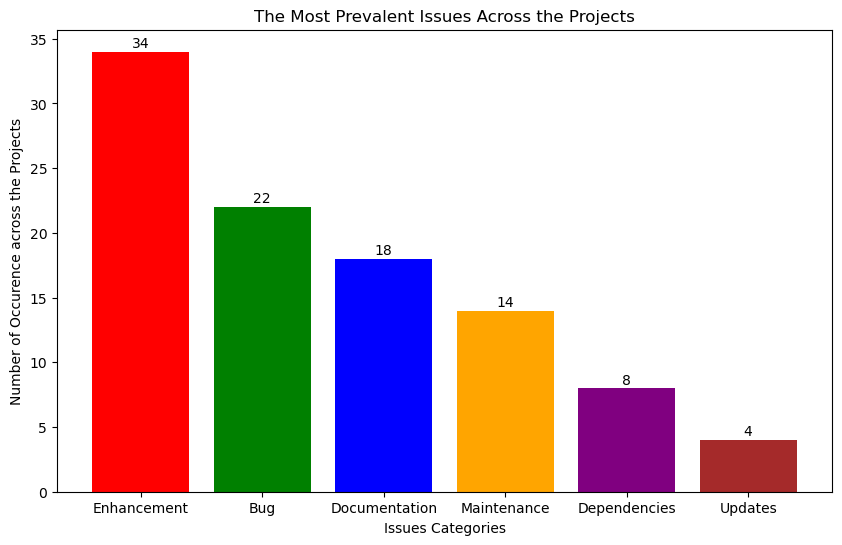

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Enhancement', 'Bug', 'Documentation', 'Maintenance', 'Dependencies', 'Updates']
#values = [18, 11, 9, 7, 4, 2]
values = [34, 22, 18, 14, 8, 4]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']  # Assigning different colors for each category

# Creating a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors)

# Adding data values on top of each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(value), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Issues Categories')
plt.ylabel('Number of Occurence across the Projects')
plt.title('The Most Prevalent Issues Across the Projects')

# Displaying the plot
plt.show()